<h1><center><font size="6">Default of Credit Card Clients - Predictive Models</font></center></h1>






<h2 style="color: red;">Introduction : </h2> 

## Dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from **April 2005** to **September 2005**. 

## Content

There are 25 variables:

**ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in J* uly, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)



<h2>Importation des bibliothèques  :  </h2> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams
%matplotlib inline

<h3>Importation et affichage de la base de données</h3>

In [3]:
#Pour afficher toutes les colonnes
pd.set_option('display.max_columns',500)
df = pd.read_excel('default of credit card clients.xls',header=1)

<h3 style="color:blue">Data Understanding  :  </h3> 

<h3>La taille de la base de données, le nombre des lignes et le nombre des colonnes</h3>

In [4]:
#Taille de la base et types : 
print(df.shape)
print(df.dtypes.value_counts())


(30000, 25)
int64    25
dtype: int64


##### Notre base contient 30000 lignes et 25 variables  .

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

<h3>Affichage des features</h3>

In [6]:
df.index

RangeIndex(start=0, stop=30000, step=1)

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [9]:
#Valeurs de la colonne cible
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

<h2 style="color:blue">les valeurs uniques dans notre base de données :</h2>


In [10]:
cat_cols= ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
          'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
          'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
          'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
          'default payment next month']
for i in cat_cols:
    print(i," : ",df[i].unique())

LIMIT_BAL  :  [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX  :  [2 1]
EDUCATION  :  [2 1 3 5 4 6 0]
MARRIAGE  :  [1 2 3 0]
AGE  :  [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0  :  [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2  :  [ 2  0 -1 -2  3  5  7  4  

<h1 style="color:blue">Vérification Si notre base contient des valeurs manquantes : </h1> 

In [11]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### conclusion : notre base de donnees ne contient pas des valeurs manquantes .

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


<h3>Observation : </h3>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


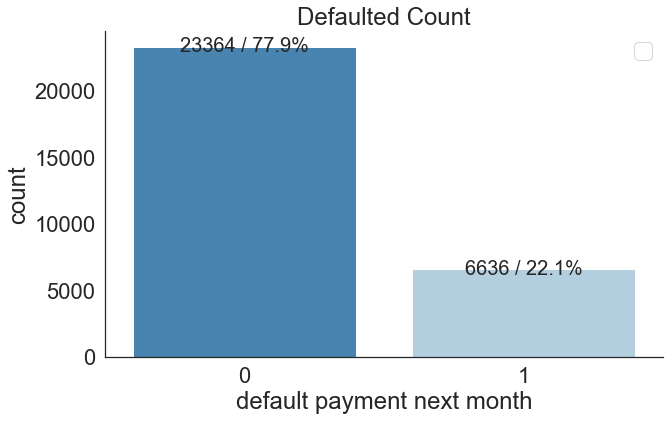

In [15]:
## affichage du default payment next month en fonction du count 
sns.set(font_scale=1)
total_cnt = df['default payment next month'].count()
rcParams['figure.figsize'] = 10,6
sns.set(font_scale= 2)
sns.set_style("white")
ax = sns.countplot(x="default payment next month" , data=df, palette = 'Blues_r')
ax.set_title('Defaulted Count')
plt.legend(loc = 'upper right')
for p in ax.patches:
    x, height , width = p.get_x() , p.get_height() , p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

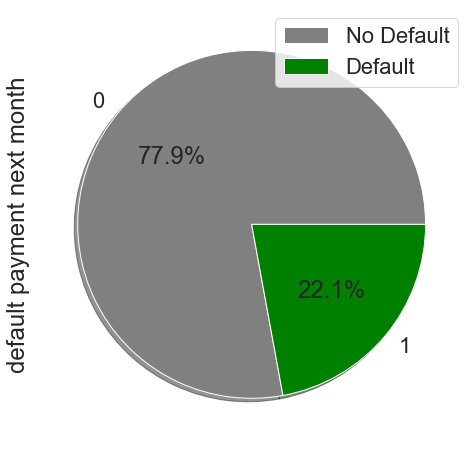

In [16]:
sns.set(font_scale=1)
total_cnt = df['default payment next month'].count()
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
plt.figure(figsize=(12,8))
df['default payment next month'].value_counts().plot.pie(autopct = '%1.1f%%', 
                                               shadow = True,
                                               colors = ['grey', 'green'])
plt.legend(labels=['No Default', 'Default'])
plt.show()

<h4>CONCLUSION :Nous pouvons voir que l'ensemble de données se compose de 77% des clients ne devraient pas faire défaut de paiement alors que 23% des clients devraient faire défaut de paiement.</h4> 


## SEX :  

In [17]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [18]:
df['default payment next month'].groupby(df['SEX']).value_counts(normalize=True)

SEX  default payment next month
1    0                             0.758328
     1                             0.241672
2    0                             0.792237
     1                             0.207763
Name: default payment next month, dtype: float64

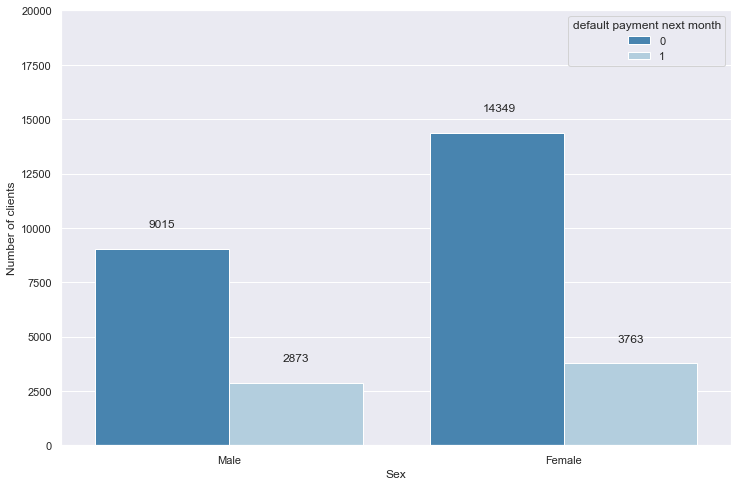

In [19]:
sns.set(font_scale=1)
plt.figure(figsize=(12,8))
ax = sns.countplot(x='SEX' ,hue="default payment next month", data=df,  palette = 'Blues_r')
plt.xlabel('Sex')
plt.ylabel('Number of clients')
plt.ylim(0,20000)
plt.xticks([0,1], ['Male', 'Female'])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))
plt.show()

#### conclusion : les femmes ont une tendances importante à ne pas payer leurs credit par rapport aux hommes.

### Education : 

In [20]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [21]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

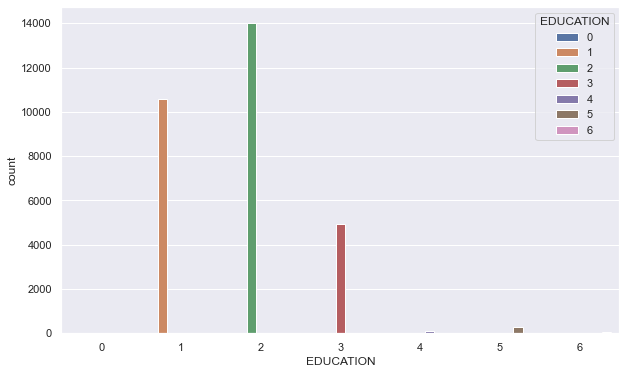

In [22]:
sns.countplot(x='EDUCATION',data=df, hue='EDUCATION')
plt.show()

#### conclusion : on remarque que la majorité de gens ont un niveau educatif "university"  et " graduate school

In [23]:
#remplacer les valeurs 0,5,6 de type "unknow" dans le type "others" parce que ils ne sont pas documenté .
df_0 = df['EDUCATION'].replace(0,4)
df_5 = df_0.replace(5,4)
df_6 = df_5.replace(6,4)
df['EDUCATION'] = df_6
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [24]:
df['default payment next month'].groupby(df['EDUCATION']).value_counts(normalize = True)

EDUCATION  default payment next month
1          0                             0.807652
           1                             0.192348
2          0                             0.762651
           1                             0.237349
3          0                             0.748424
           1                             0.251576
4          0                             0.929487
           1                             0.070513
Name: default payment next month, dtype: float64

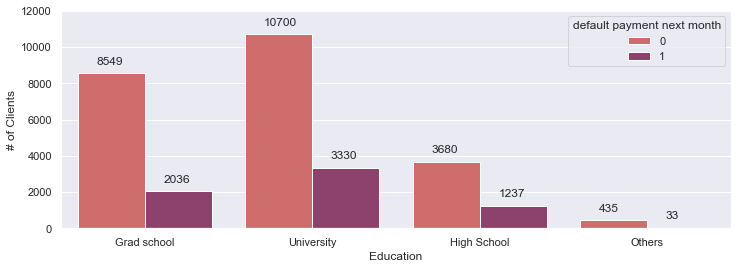

In [25]:
sns.set(font_scale=1)
plt.figure(figsize=(12,4))
ax = sns.countplot(data=df , x='EDUCATION', hue="default payment next month",palette = 'flare' )
plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Grad school', 'University', 'High School','Others'])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

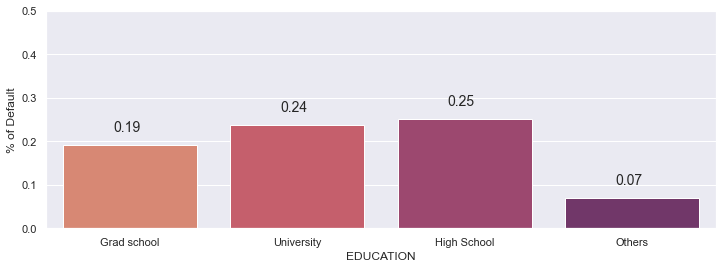

In [26]:
sns.set(font_scale=1)
plt.figure(figsize=(12,4))
ax = sns.barplot(data=df , x='EDUCATION', y="default payment next month",palette = 'flare' , ci=None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Grad school', 'University', 'High School','Others'],fontsize=11)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03), fontsize=14)

plt.show()

#### conclusion : les personnes du niveau educative 'high school' ont une forte probabilité de default de paymment .

## Marriage : 

In [27]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [28]:
df['default payment next month'].groupby(df['MARRIAGE']).value_counts(normalize=True)

MARRIAGE  default payment next month
0         0                             0.907407
          1                             0.092593
1         0                             0.765283
          1                             0.234717
2         0                             0.790717
          1                             0.209283
3         0                             0.739938
          1                             0.260062
Name: default payment next month, dtype: float64

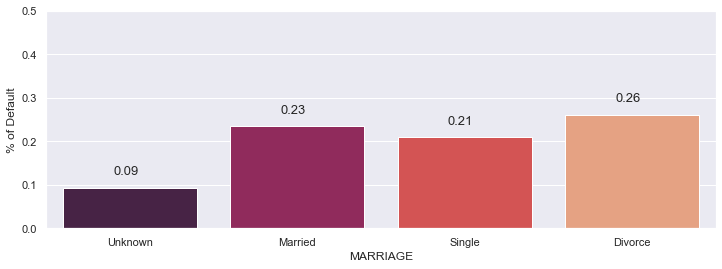

In [29]:
plt.figure(figsize=(12,4))
sns.set(font_scale=1)
ax = sns.barplot(x = "MARRIAGE", y = "default payment next month", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

<h1 style="color:blue"> Observation de la variable Marriage et sex en fonction de default payment : </h1>

In [30]:
df.groupby(by=['MARRIAGE', 'SEX'])['default payment next month'].value_counts(normalize=True)

MARRIAGE  SEX  default payment next month
0         1    0                             0.857143
               1                             0.142857
          2    0                             0.925000
               1                             0.075000
1         1    0                             0.740655
               1                             0.259345
          2    0                             0.780375
               1                             0.219625
2         1    0                             0.773386
               1                             0.226614
          2    0                             0.802784
               1                             0.197216
3         1    0                             0.694656
               1                             0.305344
          2    0                             0.770833
               1                             0.229167
Name: default payment next month, dtype: float64

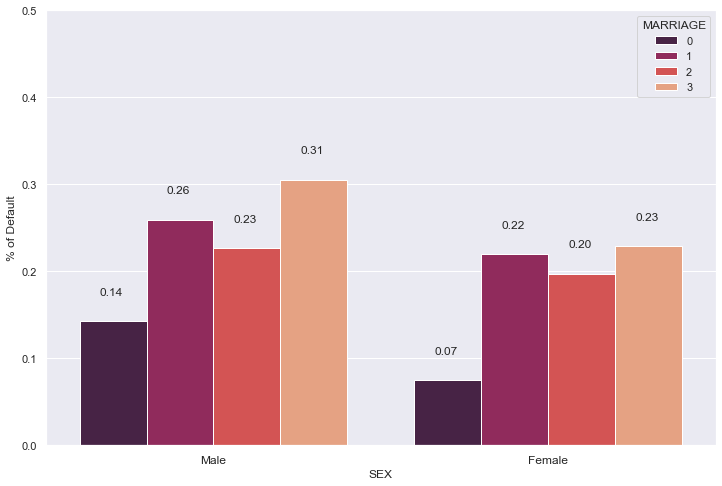

In [31]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
ax = sns.barplot(x = "SEX", y = "default payment next month", hue = "MARRIAGE", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [32]:
df.groupby(by=['EDUCATION','SEX'])['default payment next month'].value_counts(normalize=True)

EDUCATION  SEX  default payment next month
1          1    0                             0.791915
                1                             0.208085
           2    0                             0.818649
                1                             0.181351
2          1    0                             0.737998
                1                             0.262002
           2    0                             0.777957
                1                             0.222043
3          1    0                             0.726131
                1                             0.273869
           2    0                             0.763580
                1                             0.236420
4          1    0                             0.917647
                1                             0.082353
           2    0                             0.936242
                1                             0.063758
Name: default payment next month, dtype: float64

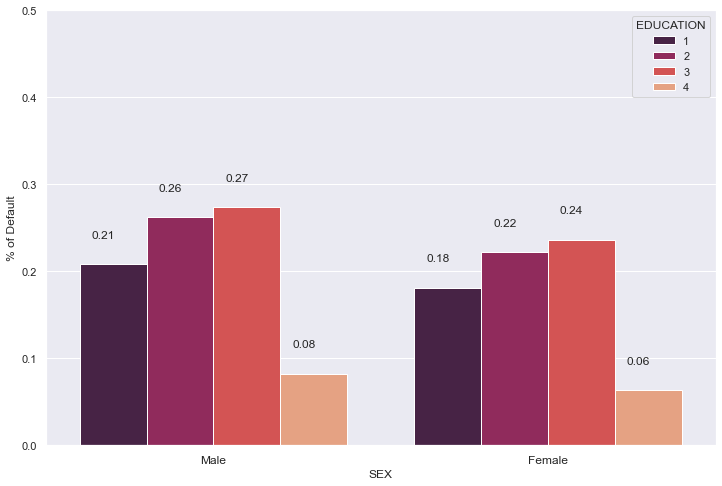

In [33]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
ax = sns.barplot(x = "SEX", y = "default payment next month", hue = "EDUCATION", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

#### Conclusion: Dans chaque comparaison, la probabilité était plus élevée pour les hommes

### AGE: 

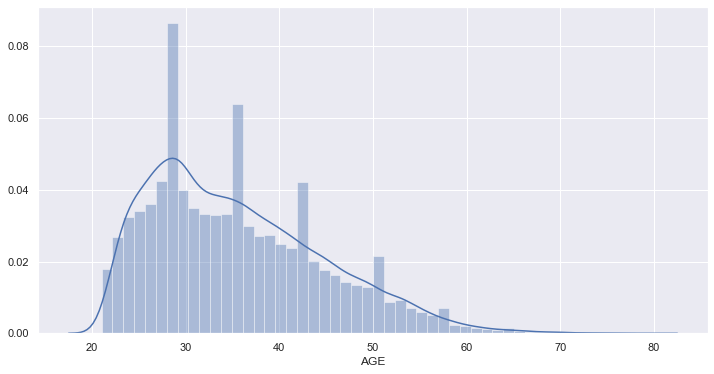

In [34]:
sns.set(font_scale=1)
plt.figure(figsize=(12,6))
sns.distplot(df['AGE'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

### Ici on remarque que la plus part des gens qui posséde des cartes bancaires sont agés entre 25 et 40 ans

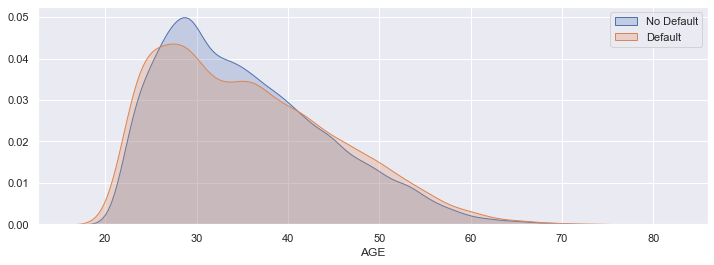

In [35]:
sns.set(font_scale=1)
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['default payment next month'] == 0), 'AGE'], label='No Default', shade=True) # kernel density estiamtion 
sns.kdeplot(df.loc[(df['default payment next month'] == 1), 'AGE'] ,label='Default', shade=True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

#### Conclusion: Entre 25 et 40 ans le risque de défaut est un peu plus faible

## LIMIT_BAL

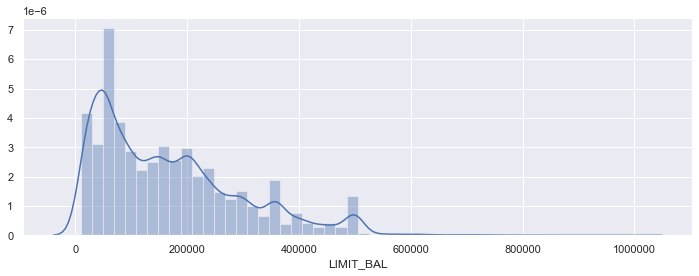

In [36]:
# feature : LIMIT_BAL : amount of given credit
plt.figure(figsize=(12,4))
sns.set(font_scale=1)
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.show()

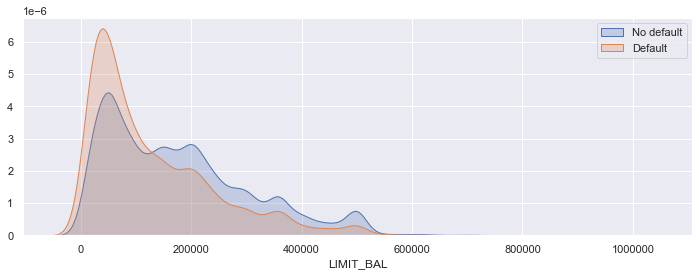

In [37]:
plt.figure(figsize=(12,4)) 
sns.set(font_scale=1)
sns.kdeplot(df.loc[(df['default payment next month'] == 0), 'LIMIT_BAL'], label = 'No default', shade=True)
sns.kdeplot(df.loc[(df['default payment next month'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

##### Conclusion:la plupart des clients ont 200k ou moins de limite de crédit.
##### Une concentration plus élevée de clients en défaut sur cette gamme


Nous pouvons constater qu'une faible pourcentage des personnes ont un LIMIT_BAL de 1 000 000 dollars, ce qui a faussé l'ensemble de données. La suppression de certaines valeurs aberrantes serait utile dans ce cas .

## Montant du crédit accordé (LIMIT BAL) + Caractéristiques démographiques (SEXE, ÉDUCATION, MARIAGE)

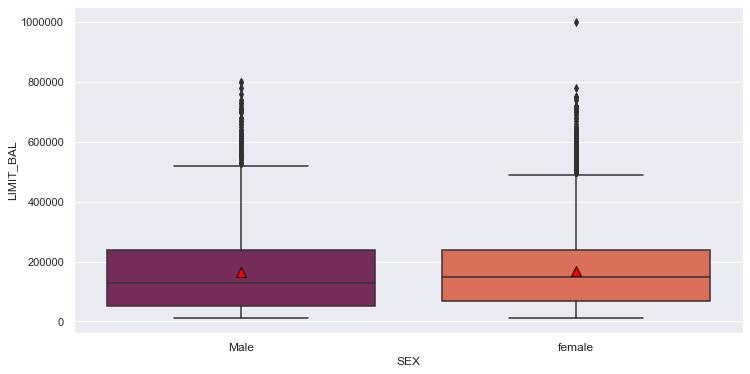

In [38]:
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
sns.boxplot(x="SEX", y="LIMIT_BAL",data=df, palette = 'rocket', showmeans=True, 
           meanprops={"markerfacecolor":"red", "markeredgecolor":"black","markersize":"10"})

plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0,1],['Male','female'], fontsize = 12)

plt.show()

In [39]:
# seaborn boxplot : (categorical destribution plots) 

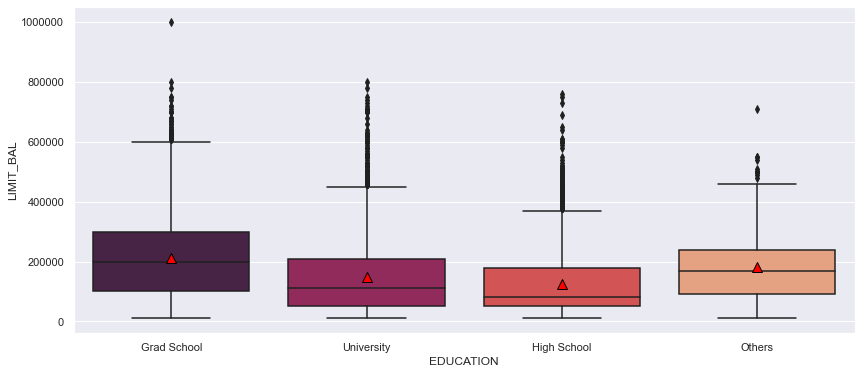

In [40]:
plt.figure(figsize=(14,6))
sns.set(font_scale=1)
sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') 
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)

plt.show()

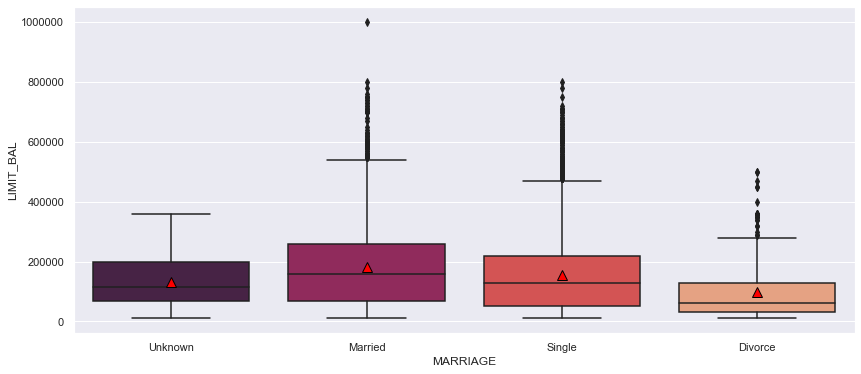

In [41]:
plt.figure(figsize=(14,6))
sns.set(font_scale=1)
sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

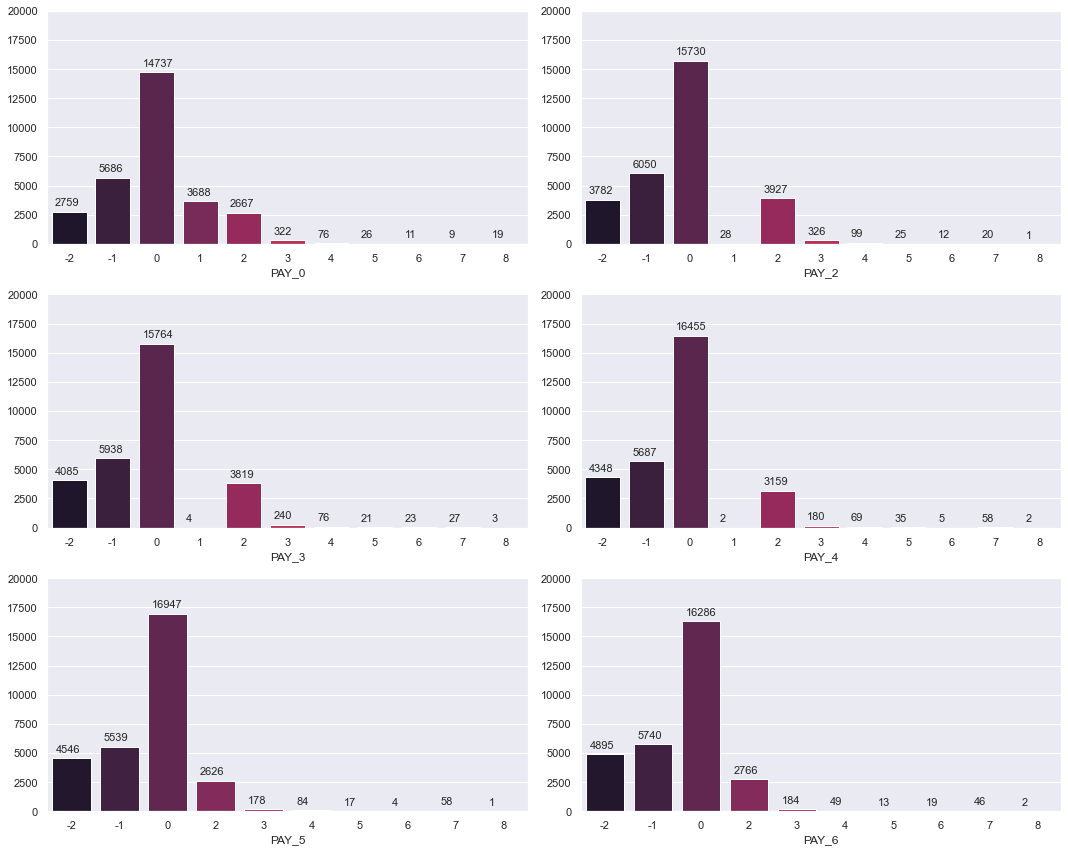

In [42]:
pay_x_fts = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
for i,col in enumerate(pay_x_fts):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()) , (p.get_x() + 0.08 , p.get_height()+500), fontsize = 11)
plt.show()

#### Conclusion : La plupart des clients paient dûment leurs factures de carte de crédit. Et il est assez clair que leur probabilité de défaut est beaucoup plus faible que les autres.

<h3>Le paiement des clients au prochain mois selon leurs historiques de paiement et leurs défaut paiement</h3>

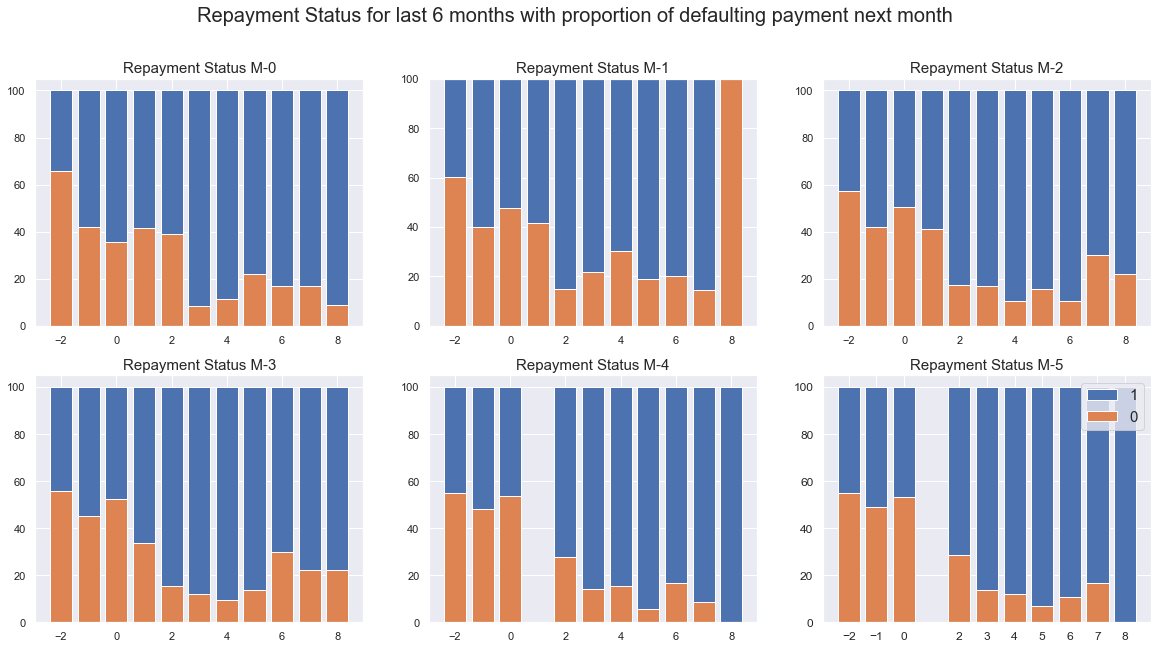

In [43]:

plt.subplots(figsize=(20,10))

ind = sorted(df.PAY_0.unique())
pay_0 = (df.PAY_0[df['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_0[df['default payment next month'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(df.PAY_2.unique())
pay_0 = (df.PAY_2[df['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_2[df['default payment next month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(df.PAY_3.unique())
pay_0 = (df.PAY_3[df['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_3[df['default payment next month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(df.PAY_4.unique())
pay_0 = (df.PAY_4[df['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_4[df['default payment next month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(df.PAY_5.unique())
pay_0 = (df.PAY_5[df['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_5[df['default payment next month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(df.PAY_6.unique())
pay_0 = (df.PAY_6[df['default payment next month'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_6[df['default payment next month'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()


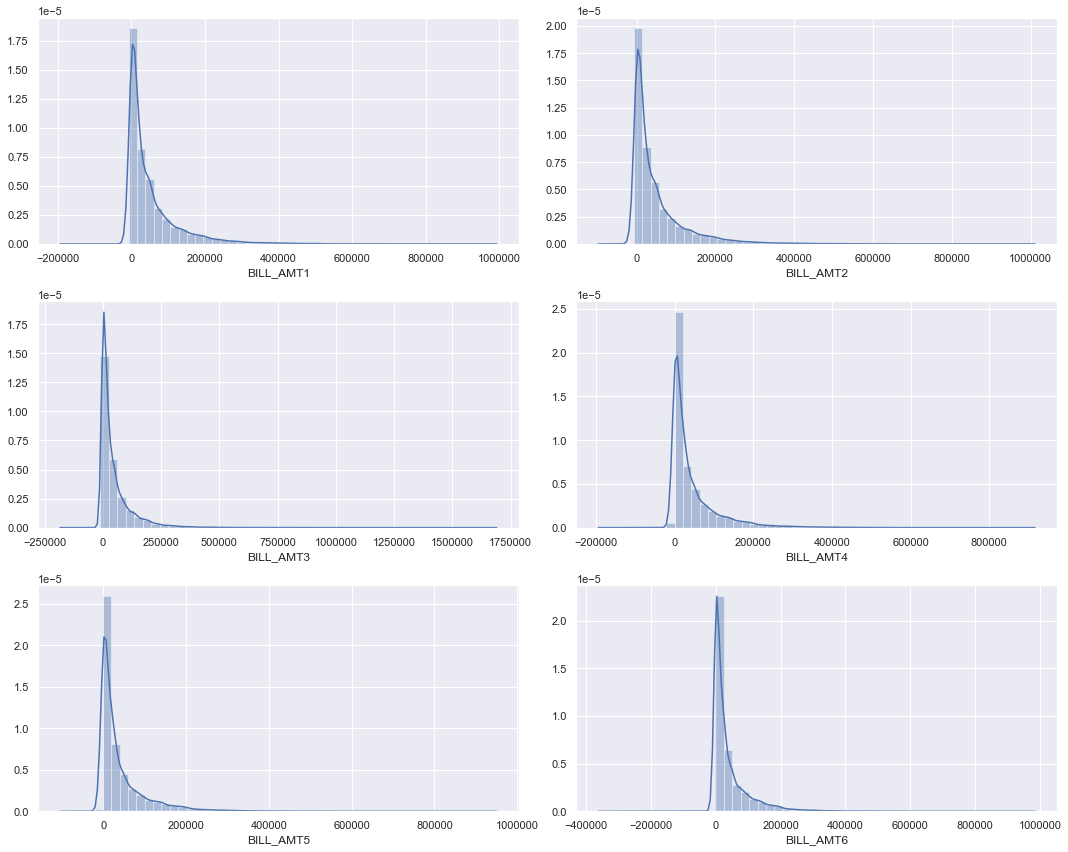

In [44]:
# feature : Amount of Bill Statement (BILL_AMTX)
sns.set(font_scale=1)

bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):
    plt.subplot(3,2,i+1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

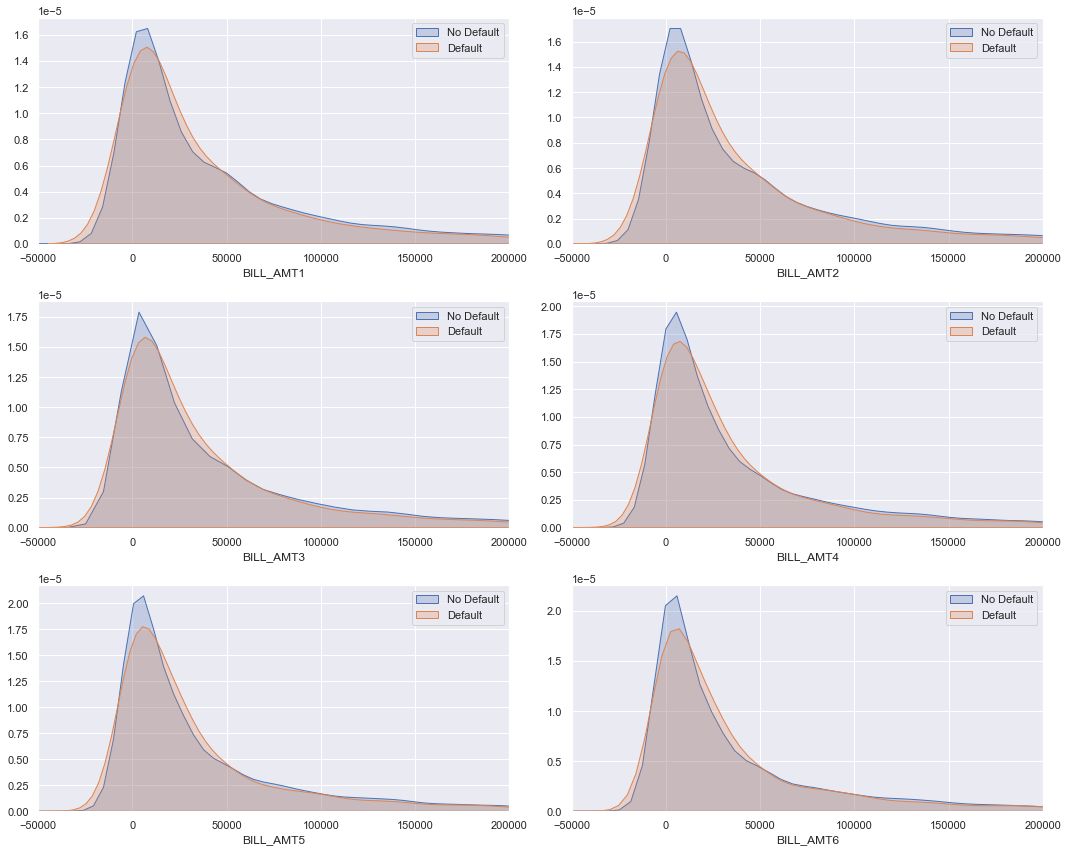

In [45]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
for i,col in enumerate(bill_amtx_fts):
    plt.subplot(3,2,i+1)
    sns.kdeplot(df.loc[(df['default payment next month'] == 0), col], label = 'No Default', shade=True)
    sns.kdeplot(df.loc[(df['default payment next month'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
plt.show()

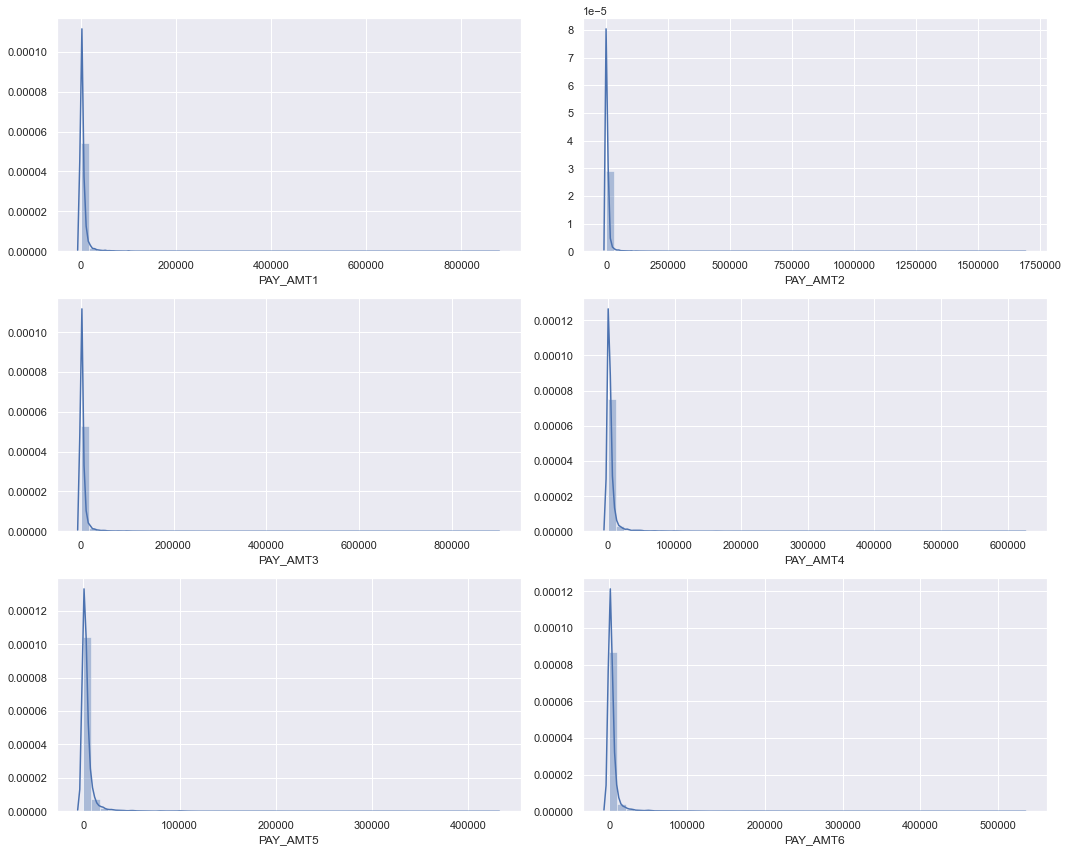

In [46]:
# Amount of Previous Payment (PAY_AMTX) 
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))
sns.set(font_scale=1) 


for i,col in enumerate(pay_amtx_fts):
    plt.subplot(3,2,i+1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') 
    plt.ylabel('')
    plt.tight_layout()

plt.show()

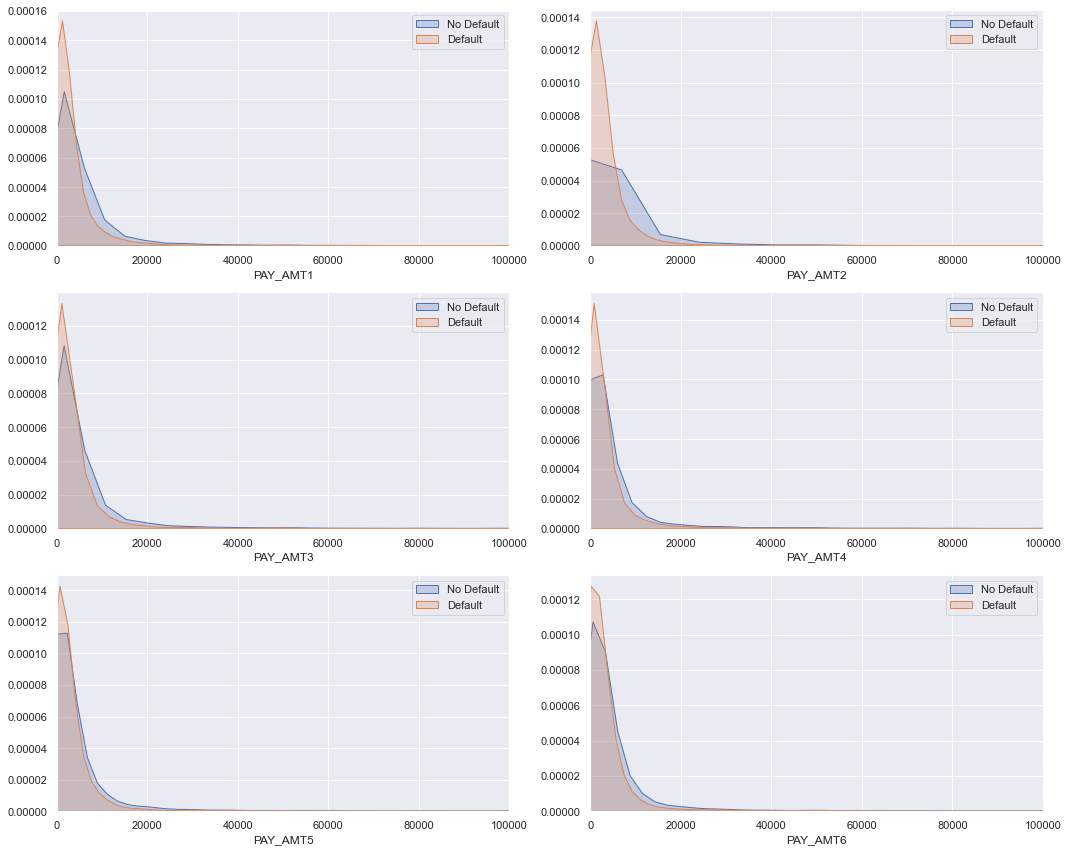

In [47]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1) 


for i,col in enumerate(pay_amtx_fts):
    plt.subplot(3,2,i + 1)   
    sns.kdeplot(df.loc[(df['default payment next month' ]== 0), col ],label  = 'No Default', shade=True )
    sns.kdeplot(df.loc[(df['default payment next month'] == 1), col ], label  = 'Default', shade = True )
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

<h1 style="color: red;"> Data Cleaning :  </h1>


In [48]:
#on aura besoin du "ID" alors on a supprimé cette colone 
del df['ID']
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [49]:
df = df.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})


In [50]:
print(df.duplicated().value_counts())
df = df.drop_duplicates()
#35 doublons
df.duplicated().value_counts()#supprimer les doublons

False    29965
True        35
dtype: int64


False    29965
dtype: int64

In [51]:
#Changer le type object 
df = df.astype('float')
df[['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','def_pay']] = df[['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','def_pay']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  29965 non-null  float64
 1   SEX        29965 non-null  int32  
 2   EDUCATION  29965 non-null  int32  
 3   MARRIAGE   29965 non-null  int32  
 4   AGE        29965 non-null  int32  
 5   PAY_1      29965 non-null  int32  
 6   PAY_2      29965 non-null  int32  
 7   PAY_3      29965 non-null  int32  
 8   PAY_4      29965 non-null  int32  
 9   PAY_5      29965 non-null  int32  
 10  PAY_6      29965 non-null  int32  
 11  BILL_AMT1  29965 non-null  float64
 12  BILL_AMT2  29965 non-null  float64
 13  BILL_AMT3  29965 non-null  float64
 14  BILL_AMT4  29965 non-null  float64
 15  BILL_AMT5  29965 non-null  float64
 16  BILL_AMT6  29965 non-null  float64
 17  PAY_AMT1   29965 non-null  float64
 18  PAY_AMT2   29965 non-null  float64
 19  PAY_AMT3   29965 non-null  float64
 20  PAY_AM

In [52]:
#Corrélation entre les features et la colonne cible
val_abs_cor = df.corr()['def_pay'].abs().sort_values()
val_abs_cor

BILL_AMT6    0.005469
BILL_AMT5    0.006859
BILL_AMT4    0.010259
AGE          0.013619
BILL_AMT3    0.014182
BILL_AMT2    0.014302
BILL_AMT1    0.019758
MARRIAGE     0.024019
EDUCATION    0.033862
SEX          0.039742
PAY_AMT6     0.053250
PAY_AMT5     0.055194
PAY_AMT3     0.056319
PAY_AMT4     0.056898
PAY_AMT2     0.058643
PAY_AMT1     0.073015
LIMIT_BAL    0.153871
PAY_6        0.186740
PAY_5        0.204059
PAY_4        0.216551
PAY_3        0.235230
PAY_2        0.263656
PAY_1        0.324964
def_pay      1.000000
Name: def_pay, dtype: float64

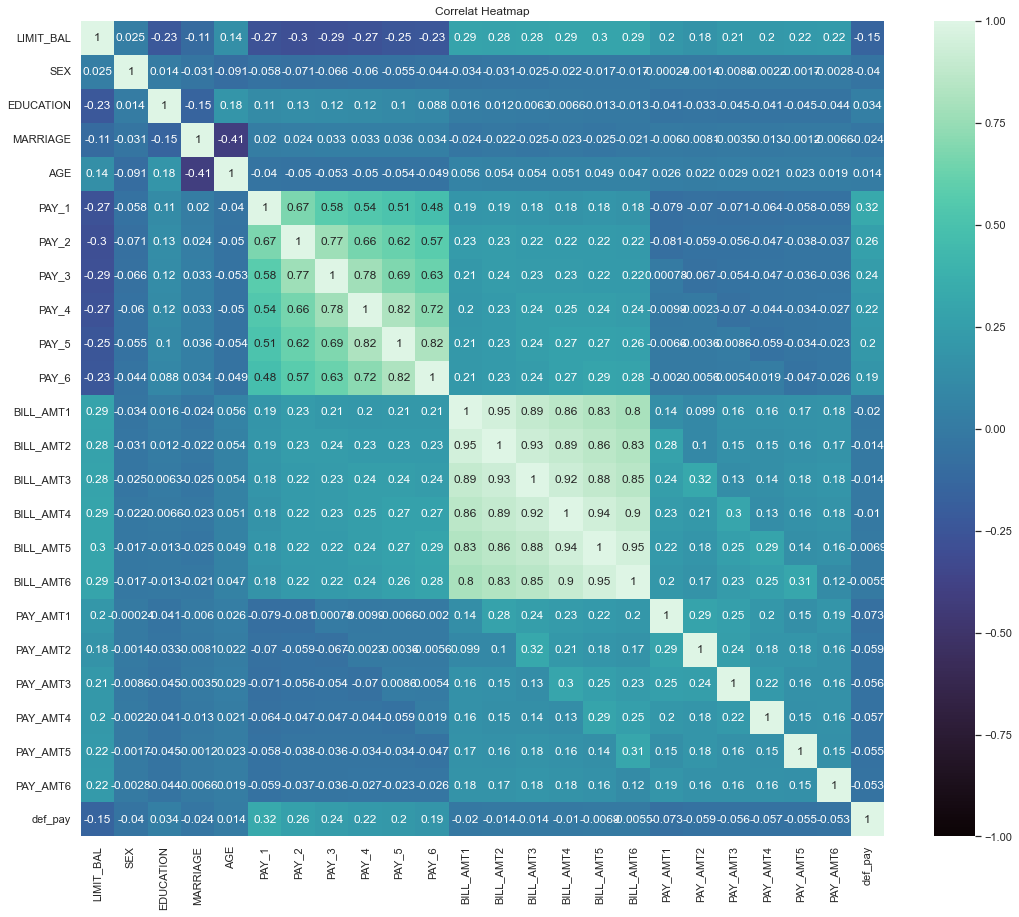

In [53]:
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap='mako')
plt.title("Correlat Heatmap")
plt.show()

In [54]:
#9821 lignes contient 0 dans tous les colonnes PAY_0  PAY_6
#2109 lignes contient -2 dans tous les colonnes ..
#1992 ....   -1 ....

### Supprimer toutes les lignes de PAY_0 ===> PAY_6 = -2 ( No consumption) 

In [55]:
pay_ = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
l = df[pay_][df[pay_]==-2]
l = l.dropna(axis=0)
df = df.drop(l.index,axis=0)


##### ces valeurs n'emporte pas d'information utile pour notre predection

### Supprimer toutes les lignes de BILL_AMT1 ==> BILL_AMT6 = 0 ,  PAY_AMT1 ==> PAY8AMT6= 0

In [56]:
bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
w = df[bill_amt][df[bill_amt]==0]
w = w.dropna(axis=0)
df = df.drop(w.index,axis=0)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27391 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  27391 non-null  float64
 1   SEX        27391 non-null  int32  
 2   EDUCATION  27391 non-null  int32  
 3   MARRIAGE   27391 non-null  int32  
 4   AGE        27391 non-null  int32  
 5   PAY_1      27391 non-null  int32  
 6   PAY_2      27391 non-null  int32  
 7   PAY_3      27391 non-null  int32  
 8   PAY_4      27391 non-null  int32  
 9   PAY_5      27391 non-null  int32  
 10  PAY_6      27391 non-null  int32  
 11  BILL_AMT1  27391 non-null  float64
 12  BILL_AMT2  27391 non-null  float64
 13  BILL_AMT3  27391 non-null  float64
 14  BILL_AMT4  27391 non-null  float64
 15  BILL_AMT5  27391 non-null  float64
 16  BILL_AMT6  27391 non-null  float64
 17  PAY_AMT1   27391 non-null  float64
 18  PAY_AMT2   27391 non-null  float64
 19  PAY_AMT3   27391 non-null  float64
 20  PAY_AM

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [57]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,27391.000000,27391.000000,27391.000000,27391.000000,27391.000000,27391.000000,27391.000000,27391.000000,27391.000000,27391.000000,27391.000000,27391.000000,27391.000000,2.739100e+04,27391.000000,27391.000000,27391.000000,27391.000000,2.739100e+04,27391.000000,27391.000000,27391.000000,27391.000000,27391.000000
mean,160375.294075,1.597386,1.859406,1.557628,35.331021,0.117703,0.043700,0.008105,-0.051550,-0.101420,-0.128692,55531.551970,53357.925121,5.102489e+04,46940.257785,43759.688511,42200.273703,5808.476799,6.087140e+03,5335.075901,4933.809646,4895.439086,5286.308021,0.224709
std,127854.473378,0.490433,0.738983,0.522121,9.239955,1.021430,1.098585,1.103683,1.080161,1.045344,1.069429,75312.829662,72869.484536,7.108208e+04,65930.657721,62392.199654,61147.275404,16764.502870,2.373501e+04,17873.854799,15969.643702,15391.215403,17929.514599,0.417398
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6016.000000,5446.000000,5.138500e+03,4531.500000,3497.500000,2500.000000,1170.000000,1.036000e+03,628.000000,400.000000,396.000000,326.000000,0.000000
50%,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27358.000000,26594.000000,2.496200e+04,21734.000000,19888.000000,19386.000000,2297.000000,2.127000e+03,2000.000000,1618.000000,1700.000000,1600.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73619.500000,70247.500000,6.699200e+04,60441.000000,55811.500000,53321.000000,5097.500000,5.000000e+03,4730.500000,4200.000000,4200.000000,4132.500000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


## Suppression des valeurs aberantes par la methode du quantile : 

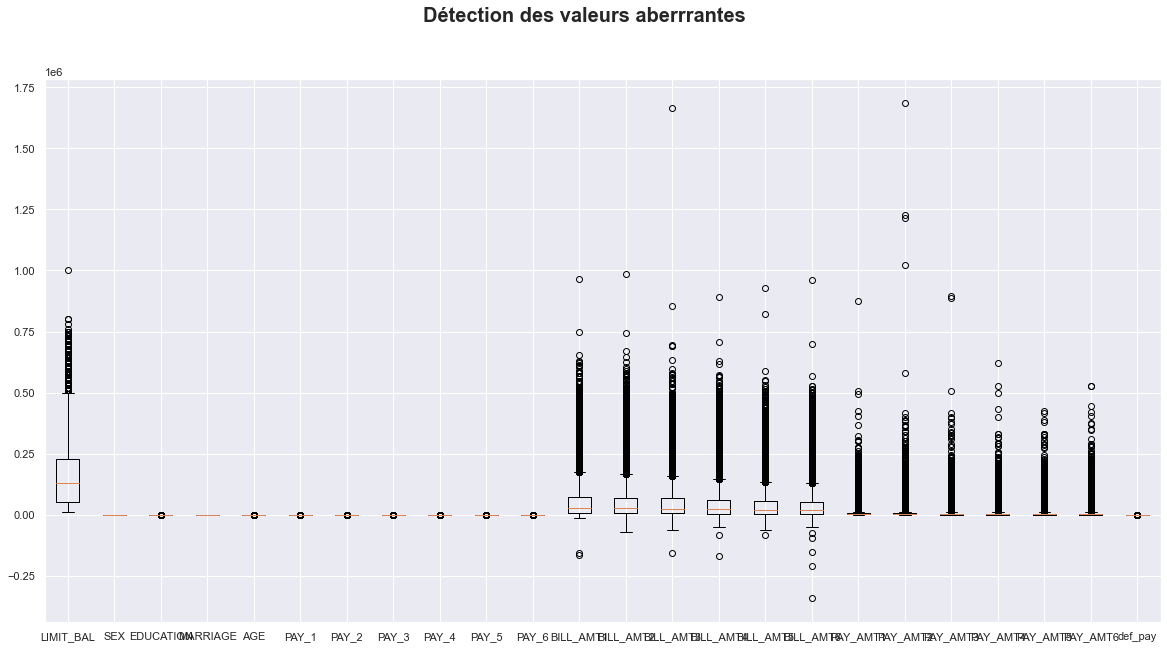

In [58]:
fig,ax = plt.subplots(figsize = (20,10))
ax.boxplot(df,labels = df.columns)
fig.suptitle("Détection des valeurs aberrrantes" , fontsize = 20,  fontweight ="bold");

In [59]:
maxx = df['LIMIT_BAL'].quantile(0.999)
maxx

680000.0

In [60]:
df = df[(df['LIMIT_BAL']<maxx)]
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Pour supprimer les valeurs aberantes du feature "Bill_AMT1===> BILL_AMT6" : 

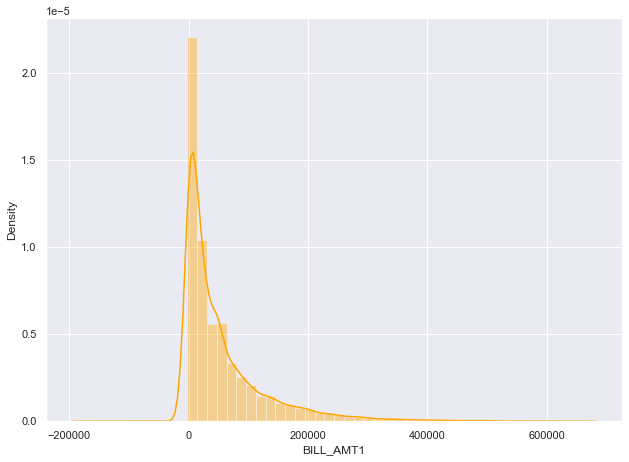

In [61]:
fig=plt.figure(figsize=(10,7))
axes=fig.add_axes([0,0,0.8,0.8])
dist=sns.distplot(df["BILL_AMT1"],color="orange")
axes.ticklabel_format(style="plain",axis="x")

In [62]:
df[df["BILL_AMT1"]>400000]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
59,400000.0,2,2,1,29,0,0,0,0,0,0,400134.0,398857.0,404205.0,360199.0,356656.0,364089.0,17000.0,15029.0,30000.0,12000.0,12000.0,23000.0,0
102,480000.0,1,1,1,63,0,0,0,2,2,0,422069.0,431342.0,479432.0,487066.0,471145.0,469961.0,16078.0,55693.0,17000.0,0.0,18000.0,24200.0,0
360,500000.0,2,2,2,23,4,3,2,0,0,0,507726.0,509229.0,499936.0,505507.0,484612.0,419643.0,10000.0,0.0,14000.0,16500.0,16000.0,19000.0,1
407,500000.0,1,1,1,37,1,2,0,0,0,0,507062.0,491956.0,430637.0,376657.0,356636.0,303510.0,325.0,15296.0,12137.0,12312.0,14113.0,10526.0,0
451,600000.0,1,1,1,53,2,2,0,0,0,0,467150.0,458862.0,469703.0,447130.0,440982.0,434715.0,0.0,18000.0,16000.0,16000.0,21000.0,20000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29605,500000.0,1,1,1,37,0,0,2,0,0,0,474934.0,507062.0,491956.0,430637.0,376657.0,356636.0,40024.0,325.0,15296.0,12137.0,12312.0,14113.0,0
29837,500000.0,1,1,2,34,0,0,0,0,0,0,494356.0,488578.0,488166.0,485249.0,441981.0,424592.0,17438.0,18852.0,16673.0,15244.0,15216.0,16037.0,0
29871,420000.0,1,2,2,31,0,0,0,0,0,0,405274.0,411980.0,287733.0,293951.0,305011.0,312087.0,14302.0,10500.0,11000.0,16000.0,12000.0,16000.0,0
29883,420000.0,1,1,1,34,0,0,0,0,0,0,454391.0,466810.0,483277.0,479800.0,489200.0,489200.0,20000.0,24000.0,11000.0,10000.0,0.0,11000.0,0


In [63]:
df.drop((df[df["BILL_AMT1"]>400000]).index,inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [64]:
df[df["BILL_AMT2"]>400000]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
6,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
1234,280000.0,2,1,2,30,0,0,0,0,0,0,270276.0,506260.0,263734.0,268216.0,262895.0,264508.0,11000.0,10000.0,10004.0,10020.0,10100.0,10000.0,0
8500,400000.0,2,1,1,28,-1,-1,2,0,0,0,6500.0,405016.0,391178.0,392932.0,394410.0,410127.0,405016.0,0.0,14000.0,13560.0,28000.0,0.0,0
13613,340000.0,1,1,2,25,-1,0,0,0,0,0,239715.0,421651.0,203784.0,181490.0,154478.0,135259.0,10469.0,6618.0,5168.0,5014.0,5398.0,2738.0,1
16201,400000.0,2,2,1,43,0,0,0,0,0,0,398711.0,407664.0,186081.0,189987.0,193824.0,201699.0,17000.0,7000.0,7000.0,7000.0,11000.0,10000.0,0
21227,410000.0,1,1,1,41,0,0,0,0,0,0,396975.0,409780.0,383225.0,396283.0,274224.0,321787.0,30000.0,20000.0,20000.0,50000.0,30000.0,43312.0,0
24553,600000.0,1,1,1,36,0,0,0,0,0,0,372396.0,416438.0,459749.0,455910.0,463611.0,466570.0,50000.0,50000.0,15000.0,20000.0,15000.0,7000.0,0
27378,410000.0,1,2,1,41,0,0,0,0,-1,0,392906.0,400864.0,410877.0,419454.0,1356.0,1362.0,16000.0,17986.0,18545.0,1362.0,6.0,0.0,0
28003,510000.0,2,1,2,30,-1,-1,-1,-1,0,0,71121.0,481382.0,559712.0,163628.0,117475.0,116656.0,493358.0,1227082.0,164577.0,510.0,6239.0,4550.0,0


In [65]:
df.drop((df[df["BILL_AMT2"]>400000]).index,inplace=True)


In [66]:
df[df["BILL_AMT3"]>400000]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
3343,300000.0,2,2,1,27,0,0,0,0,0,0,286321.0,283547.0,578971.0,293063.0,296677.0,230338.0,20000.0,12003.0,10524.0,11238.0,8814.0,9463.0,1
5296,500000.0,2,1,1,33,-2,-2,-1,-1,-2,-1,125.0,-18088.0,1664089.0,121757.0,97115.0,377217.0,4366.0,1684259.0,121831.0,97670.0,379267.0,26759.0,0
6864,500000.0,1,1,2,30,0,0,0,0,0,0,192257.0,201402.0,444462.0,418237.0,424244.0,383145.0,40000.0,300018.0,15000.0,17000.0,15000.0,11100.0,0
8164,290000.0,1,1,1,56,0,0,0,0,0,0,222000.0,226917.0,415700.0,232732.0,220460.0,224780.0,10013.0,8501.0,15018.0,10001.0,7997.0,7624.0,0
15561,480000.0,1,1,1,43,0,0,0,0,0,0,377420.0,389573.0,400693.0,393892.0,348733.0,331930.0,20000.0,20000.0,20005.0,15000.0,15000.0,12000.0,0
21114,480000.0,1,1,1,49,0,0,0,0,0,0,376186.0,389822.0,401982.0,410694.0,407436.0,407809.0,20000.0,18000.0,15000.0,15000.0,14000.0,13000.0,0
24118,500000.0,1,1,2,27,0,0,0,0,0,0,252881.0,224633.0,486367.0,616836.0,250600.0,296217.0,30032.0,271636.0,30876.0,60044.0,50539.0,100562.0,0
25132,450000.0,1,1,1,52,0,0,0,0,0,0,388009.0,393535.0,403891.0,415193.0,145198.0,138389.0,15000.0,16701.0,20101.0,7000.0,5750.0,10000.0,0
25731,80000.0,2,3,1,37,0,0,-2,-2,-2,-1,47751.0,-215.0,855086.0,632.0,632.0,124542.0,215.0,1024516.0,632.0,632.0,124542.0,14770.0,0
26593,380000.0,1,1,2,32,0,0,0,0,0,0,387851.0,349973.0,689643.0,334456.0,329981.0,292421.0,13070.0,13000.0,26000.0,20095.0,11000.0,11000.0,0


In [67]:
df.drop((df[df["BILL_AMT3"]>400000]).index,inplace=True)

In [68]:
df[df["BILL_AMT4"]>400000]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
40,360000.0,1,1,2,33,0,0,0,0,0,0,218668.0,221296.0,206895.0,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
214,470000.0,1,2,2,27,2,2,2,2,0,0,296573.0,303320.0,307843.0,479978.0,305145.0,309959.0,13000.0,11001.0,0.0,10484.0,10838.0,10367.0,0
7297,430000.0,1,1,1,40,-1,-1,-1,-1,-1,-1,6112.0,10548.0,31401.0,417588.0,3414.0,4761.0,10590.0,31448.0,417588.0,3414.0,4761.0,15331.0,0
15080,500000.0,1,1,2,38,0,-1,-1,0,0,0,130700.0,15785.0,154653.0,450497.0,425957.0,298509.0,15785.0,154653.0,338394.0,16000.0,500.0,19999.0,0
24978,350000.0,1,1,2,33,-2,-2,-2,-1,0,0,6015.0,8751.0,686.0,430667.0,161089.0,119339.0,8797.0,691.0,238241.0,1009.0,596.0,10356.0,0
28743,440000.0,2,2,2,29,-1,-1,-1,-1,0,0,23147.0,88848.0,42045.0,400321.0,229680.0,265404.0,70554.0,45213.0,400972.0,5456.0,100267.0,7530.0,0


In [69]:
#df.drop((df[df["BILL_AMT4"]>620000]).index,inplace=True)

In [70]:
df[df["BILL_AMT5"]>400000]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
5035,400000.0,1,2,1,45,0,0,2,0,0,2,337135.0,373869.0,366338.0,374255.0,409777.0,527566.0,44000.0,0.0,14000.0,42000.0,126000.0,18000.0,0
13442,610000.0,2,1,2,35,0,0,0,0,0,0,389335.0,388150.0,392776.0,399343.0,402432.0,409912.0,14117.0,14100.0,14144.0,17100.0,17500.0,3600.0,0
13782,380000.0,1,1,1,49,2,0,0,0,0,0,380933.0,380703.0,356474.0,308948.0,547880.0,309322.0,14651.0,12238.0,13479.0,13532.0,12015.0,11525.0,1
15080,500000.0,1,1,2,38,0,-1,-1,0,0,0,130700.0,15785.0,154653.0,450497.0,425957.0,298509.0,15785.0,154653.0,338394.0,16000.0,500.0,19999.0,0
24937,450000.0,1,1,1,37,1,2,0,0,0,0,387192.0,379442.0,387398.0,395655.0,403568.0,418182.0,0.0,14062.0,14700.0,14500.0,21077.0,12575.0,1


In [71]:
df.drop((df[df["BILL_AMT5"]>400000]).index,inplace=True)

In [72]:
df[df["BILL_AMT6"]>400000]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
9321,500000.0,2,1,2,34,0,0,0,0,0,0,119451.0,143348.0,159291.0,262663.0,308074.0,400050.0,26000.0,20000.0,106700.0,50000.0,100000.0,200000.0,0
13863,520000.0,2,3,1,41,-2,-2,-1,0,0,0,7322.0,2728.0,385425.0,387189.0,395445.0,402289.0,2728.0,415552.0,14000.0,14005.0,14000.0,15200.0,0
28037,500000.0,2,1,2,29,0,0,0,0,-1,-1,28555.0,33055.0,42392.0,36641.0,12149.0,426518.0,5000.0,10000.0,5132.0,12159.0,426529.0,20016.0,0


In [73]:
df.drop((df[df["BILL_AMT6"]>400000]).index,inplace=True)

In [74]:
df.shape

(27162, 24)

In [75]:
x = df.drop('def_pay',axis=1)
y = df['def_pay']

## Feature Selection

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [77]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[0.0565087  0.01110672 0.02898596 0.02151188 0.0545201  0.09593695
 0.0562143  0.03536424 0.03358355 0.03168252 0.03180564 0.05122189
 0.04705998 0.04629427 0.04531656 0.04529934 0.04473919 0.04468723
 0.04361179 0.04287061 0.04205684 0.04366354 0.04595818]


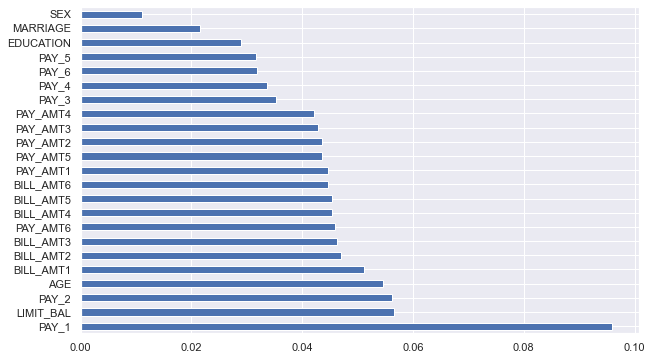

In [78]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()


### Conclusion : classement des features selon leurs importance dans un ordre croissant càd , du moins important au plus important .

In [79]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [80]:
#on a supprimer les colonnes : SEX ,Education , Marriage et la variable cible:
# on a choisi " le def_pay " qui est la variable cible :
x = df.drop(df.columns[[1,2,3,23]],axis=1)
y = df['def_pay']
x

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


#  Normalisation :

## l'avantage de RobustScaler

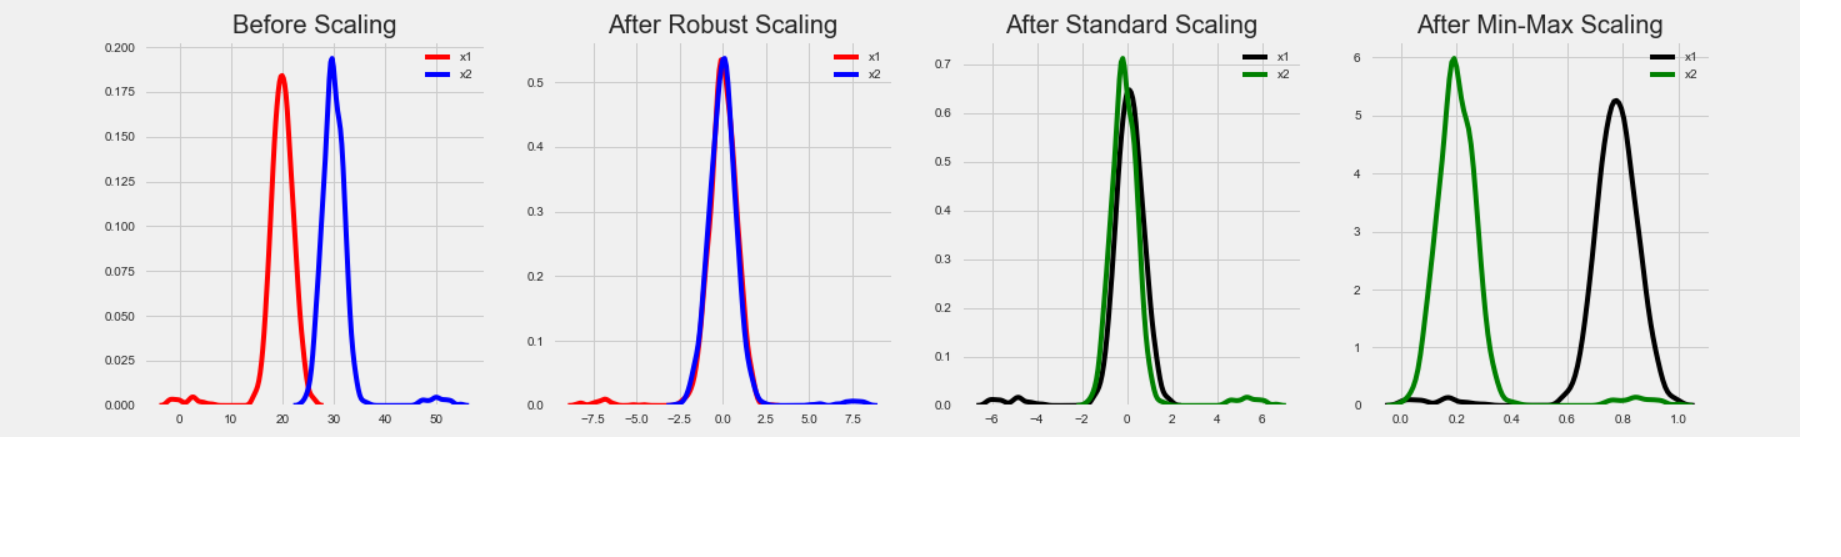

In [81]:
from IPython.display import Image
Image(filename='img1.png')

In [82]:
from sklearn.preprocessing import RobustScaler
roscaler = RobustScaler()
X = pd.DataFrame(roscaler.fit_transform(x),columns=x.columns)
X

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.611111,-0.769231,2.0,2.0,-1.0,-1.0,-2.0,-2.0,-0.351650,-0.364115,-0.395007,-0.390068,-0.388706,-0.389678,-0.583117,-0.354969,-0.508971,-0.436800,-0.448323,-0.431738
1,-0.055556,-0.615385,-1.0,2.0,0.0,0.0,0.0,2.0,-0.370353,-0.385788,-0.361926,-0.330079,-0.320728,-0.323628,-0.583117,-0.276730,-0.254485,-0.163800,-0.448323,0.112184
2,-0.222222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033153,-0.192166,-0.181382,-0.127322,-0.094599,-0.074739,-0.189445,-0.150943,-0.254485,-0.163800,-0.177760,0.928066
3,-0.444444,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.302862,0.346204,0.411722,0.129045,0.181072,0.208784,-0.064445,-0.020377,-0.203588,-0.136500,-0.159091,-0.159777
4,-0.444444,1.769231,-1.0,0.0,-1.0,0.0,0.0,0.0,-0.280177,-0.323697,0.188370,-0.006151,-0.012002,-0.002187,-0.064445,8.699623,2.035882,2.020202,-0.261905,-0.247076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27157,0.500000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,2.459770,2.621787,3.052141,1.223411,0.225893,-0.066010,1.621240,4.503145,0.764219,0.395031,0.904491,-0.159777
27158,0.111111,0.692308,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-0.385532,-0.384167,-0.348315,-0.225446,-0.286591,-0.389678,-0.106717,0.358742,1.780888,-0.401583,-0.448323,-0.431738
27159,-0.555556,0.230769,4.0,3.0,2.0,-1.0,0.0,0.0,-0.356937,-0.360117,-0.360664,-0.007288,0.016252,0.002390,-0.583117,-0.528302,5.089706,0.709801,0.092803,0.411341
27160,-0.277778,0.538462,1.0,-1.0,0.0,0.0,0.0,-1.0,-0.436098,0.820673,0.860102,0.577498,-0.155455,0.601663,21.693854,0.329308,-0.209187,0.088998,13.881764,0.058880


## Modeling

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=1)

## Logistic Regression : 

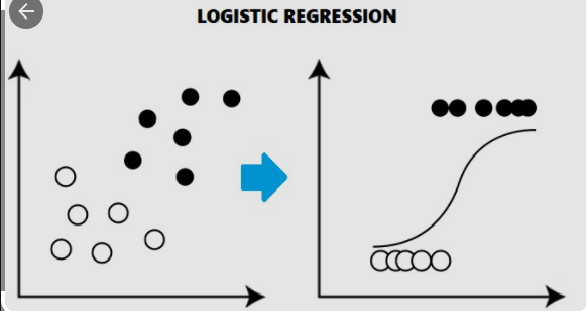

In [85]:
from IPython.display import Image
Image(filename='img11.png')

In [86]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [87]:
y_pred = logmodel.predict(X_test)

In [88]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.81237,0.702665,0.275578,0.395891,0.621046


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6331
           1       0.70      0.28      0.40      1818

    accuracy                           0.81      8149
   macro avg       0.76      0.62      0.64      8149
weighted avg       0.80      0.81      0.78      8149



# Stochastic Gradient Descent

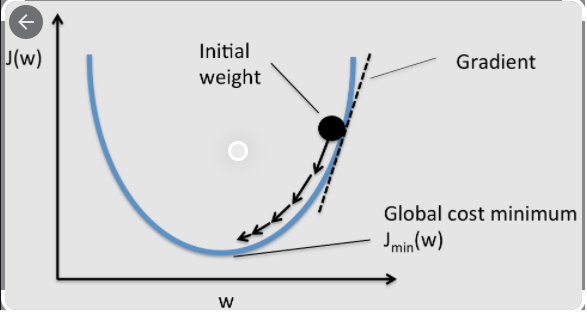

In [90]:
from IPython.display import Image
Image(filename='img12.png')

In [91]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=1)

In [92]:
y_pred = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.796908,0.566531,0.381738,0.456129,0.648933


In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6331
           1       0.57      0.38      0.46      1818

    accuracy                           0.80      8149
   macro avg       0.70      0.65      0.67      8149
weighted avg       0.78      0.80      0.78      8149



# K-Nearest Neighbour

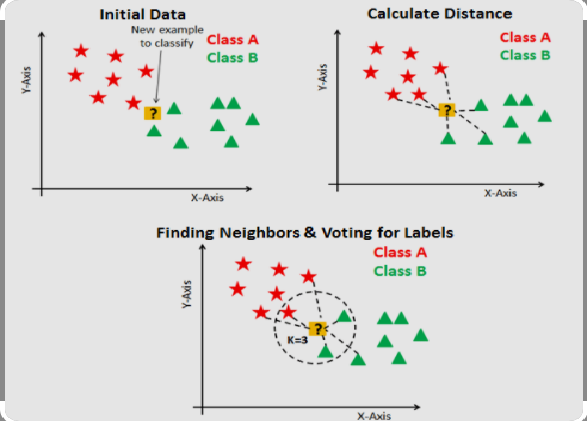

In [94]:
from IPython.display import Image
Image(filename='img2.png')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
np.random.seed(1)


kaa = [x for x in range(1,40)]
les_score_f1 = list()
les_acc = list()
error = list ()


for k in kaa:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error.append(np.mean(predictions != y_test))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [ ]:
min_error = error[0]
mel_k = 1
for k,rmse in enumerate(error):
    if (rmse<min_error):
        min_error = rmse
        mel_k = k+1
print(mel_k)


In [ ]:
Best = KNeighborsClassifier(n_neighbors=mel_k, algorithm='brute')
Best.fit(X_train, y_train)
y_pred = Best.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

In [ ]:
Best = KNeighborsClassifier(n_neighbors=mel_k, algorithm='brute')
Best.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test,y_pred))

# Support Vector Machine

In [ ]:
from IPython.display import Image
Image(filename='img3.png')

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

In [ ]:
print(classification_report(y_test,y_pred))

## Gaussian Naive Bayes

In [ ]:
from IPython.display import Image
Image(filename='img4.png')

In [ ]:
from IPython.display import Image
Image(filename='img5.png')

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

In [ ]:
y_pred =naive_bayes.predict(X_test)


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

In [ ]:
print(classification_report(y_test,y_pred))

# Decision Tree Classification

In [ ]:
from IPython.display import Image
Image(filename='img6.png')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [ ]:
dct.fit(X_train,y_train)

In [ ]:
y_pred = dct.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

In [ ]:
print(classification_report(y_test,y_pred))

# Random Forest Classification

In [ ]:

from IPython.display import Image
Image(filename='img9.png')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [ ]:
rfc.fit(X_train,y_train)


In [ ]:
y_pred = rfc.predict(X_test)


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

In [ ]:
print(classification_report(y_test,y_pred))

## XGBOOST classifier

In [ ]:
from IPython.display import Image
Image(filename='img10.png')

In [ ]:
#il faut installer au promp anaconda
# conda install -c anaconda py-xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
y_pred =xgb.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

In [ ]:
print(classification_report(y_test,y_pred))

## adaboostclassifier

In [ ]:

from IPython.display import Image
Image(filename='img7.png')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada =AdaBoostClassifier()
Ada.fit(X_train, y_train)

In [ ]:
y_pred =Ada.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['AdaBoostClassifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

In [ ]:
print(classification_report(y_test,y_pred))

## neural_network

In [ ]:
from IPython.display import Image
Image(filename='img8.png')

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)

In [ ]:
y_pred =nn.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['neural_network', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

In [ ]:
print(classification_report(y_test,y_pred))

## <span style="color:blue"> l'utilisation de grid search pour améliorer les performances </span>


In [ ]:
## Model Optimization using Grid Search and K-Fold Cross validation¶

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score


# Grid Search on Logistic Regression Model

In [ ]:
logmodel_params = {'C': [0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=5,n_jobs=-1)


In [ ]:
grid_search_log.fit(X_train,y_train)

In [ ]:
best_accuracy = grid_search_log.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy)


In [ ]:
best_parameters = grid_search_log.best_params_
best_parameters

In [ ]:
y_pred_log = grid_search_log.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [ ]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

In [ ]:
print(classification_report(y_pred_log,y_test))

# Grid Search on Stochastic Gradient Descent

In [ ]:
sgd_params = {'alpha': [ 0.001, 0.01, 0.1], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_sgd.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

In [ ]:
best_parameters_2 = grid_search_sgd.best_params_
best_parameters_2

In [ ]:
y_pred_sgd = grid_search_sgd.predict(X_test)

In [ ]:
sgd_prob = grid_search_sgd.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)
model =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

In [ ]:
print(classification_report(y_pred_sgd,y_test))

## Grid Search on SVM model

In [ ]:
scv_params = {'C':[0.01,0.1],'kernel':['linear','rbf'],'gamma':[0.1,0.01]}

In [ ]:
grid_search_1 = GridSearchCV(SVC(),param_grid=scv_params,scoring='accuracy',cv=5,verbose=3)
grid_search_1.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

In [ ]:
best_parameters = grid_search_1.best_params_
best_parameters

In [ ]:
y_pred_svm = grid_search_1.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_svm)
acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
model =  pd.DataFrame([['Support vecteur machine Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

##  Grid Search on KNN Classifier 

In [ ]:
k_range = list(range(1, 40))
weight_options = ['distance']
dis = ["euclidean","manhattan"]
knn_param = {'n_neighbors': k_range,'metric': dis ,'weights': weight_options}

In [ ]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

In [ ]:
best_parameters = grid_search.best_params_
best_parameters

In [ ]:
y_pred_KNN = grid_search.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
model =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

## Grid Search on Decision Tree

In [ ]:
parameters = {'max_depth':[2,4,6],'min_samples_leaf':[2,4,6], 'min_samples_split':[2,4,6]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_dt.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

In [ ]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

In [ ]:
y_pred_dct = grid_search_dt.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

## Grid Search on Random Forest Classifier 

In [ ]:
param_grid_rf = {'n_estimators': [100,200,300,400,600,800],
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

In [ ]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

In [ ]:
y_pred_rf = grid_search_rf.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

## Grid Search on XGBOOST Classifier

In [ ]:
param_grid_xgb ={'n_estimators': [40,45,50,100,150], 'max_depth': [1,2,3,5,7], 'min_child_weight': [1,2,3,4]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_xgb.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

In [ ]:
best_parameters_2 = grid_search_xgb.best_params_
best_parameters_2

In [ ]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

## Grid Search on ada BOOST Classifier

In [ ]:
param_grid = {'n_estimators':[350,400,450,500,1000,2000],'learning_rate':[.0001,.001,0.01,.1]}
grid_search_abc = GridSearchCV(estimator=Ada,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_abc = grid_search_abc.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_abc.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

In [ ]:
best_parameters_2 = grid_search_abc.best_params_
best_parameters_2

In [ ]:
y_pred_abc = grid_search_abc.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_abc)
acc = accuracy_score(y_test, y_pred_abc)
prec = precision_score(y_test, y_pred_abc)
rec = recall_score(y_test, y_pred_abc)
f1 = f1_score(y_test, y_pred_abc)
model =  pd.DataFrame([['AdaBoost Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_abc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_xgb) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_dct)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_sgd) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_log) 
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, y_pred_rf) 
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(y_test, y_pred_svm) 
roc_auc7 = auc(fpr7, tpr7)
fpr8, tpr8, threshold8 = roc_curve(y_test, y_pred_KNN) 
roc_auc8 = auc(fpr8, tpr8)

plt.figure(figsize=(12,12)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='AdaBoost (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='XGBOOST(area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='Decision Tree(area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Stochastic Gradient Descent (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='black', lw=2, label='Logistic Regression (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='brown', lw=2, label='Random Forest  (area = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='black', lw=2, label='support vector machine (area = %0.2f)'% roc_auc7)
plt.plot(fpr8, tpr8, color='brown', lw=2, label='K-nearest neighbors  (area = %0.2f)'% roc_auc8)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()